In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
print("Libraries Import successfully")

Libraries Import successfully


In [3]:
datatype={"key": "object","fare_amount":"float64","pickup_datetime": "object",
         "pickup_longitude":"float64","pickup_latitude":"float64","dropoff_longitude":"float64",
         "dropoff_latitude":"float64","passanger_count":"int64"}
df_raw = pd.read_csv(r'C:\Users\dasvi\OneDrive\Desktop\new-york-city-taxi-fare-prediction\train.csv', low_memory=False, nrows = 10**5,dtype=datatype,parse_dates=["pickup_datetime"])
df_raw.drop(['key'],axis=1,inplace=True)

df_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
print("Shape of Dataset:",df_raw.shape)

Shape of Dataset: (100000, 7)


In [5]:
#Creating datetime features based on pickup_datetime
import calendar
df_raw['pickup_date']=df_raw['pickup_datetime'].dt.date
df_raw['pickup_day']=df_raw['pickup_datetime'].apply(lambda x:x.day)
df_raw['pickup_hour']=df_raw['pickup_datetime'].apply(lambda x:x.hour)
df_raw['pickup_day_of_week']=df_raw['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df_raw['pickup_month']=df_raw['pickup_datetime'].apply(lambda x:x.month)
df_raw['pickup_year']=df_raw['pickup_datetime'].apply(lambda x:x.year)

df_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [6]:
df_raw.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820,15.664270,13.495110,6.261230,2011.74389
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171,8.677631,6.507434,3.450569,1.86602
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.00000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000,8.000000,9.000000,3.000000,2010.00000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000,16.000000,14.000000,6.000000,2012.00000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000,23.000000,19.000000,9.000000,2013.00000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000,31.000000,23.000000,12.000000,2015.00000


In [7]:
#Removing Outliner value
df_raw = df_raw[((df_raw['pickup_longitude'] > -78)&
                (df_raw['pickup_longitude'] < -70))&
               ((df_raw['dropoff_longitude'] > -78)&
               (df_raw['dropoff_longitude'] < -70))&
               ((df_raw['pickup_latitude'] > 37)&
               (df_raw['pickup_latitude'] < 45))&
               ((df_raw['dropoff_latitude'] > 37)&
               (df_raw['dropoff_latitude'] < 45))&
               (df_raw['passenger_count'] > 0)&
               (df_raw['fare_amount'] >= 2.5)]
df_raw.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000,97549.000000
mean,11.354236,-73.975142,40.751032,-73.974017,40.751466,1.680386,15.663000,13.492870,6.264144,2011.743267
std,9.698185,0.043751,0.036181,0.039904,0.037161,1.298536,8.676972,6.505561,3.451690,1.871159
min,2.500000,-75.425388,38.754215,-75.354559,39.296307,1.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992266,40.736642,-73.991395,40.735762,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982076,40.753531,-73.980437,40.753962,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968287,40.767677,-73.965127,40.768476,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.183332,-72.854940,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


In [8]:
df_raw.isnull().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_date           0
pickup_day            0
pickup_hour           0
pickup_day_of_week    0
pickup_month          0
pickup_year           0
dtype: int64

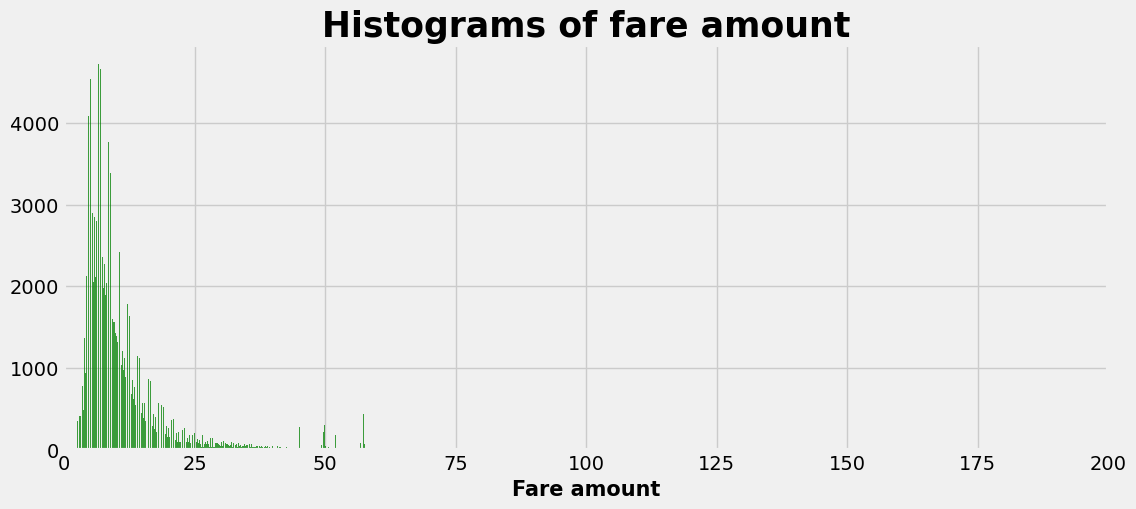

In [9]:
plt.figure(figsize=(12,5))
n, bins, patches = plt.hist(df_raw.fare_amount, 1000, facecolor='green', alpha=0.75)
plt.xlabel('Fare amount', fontsize=15,fontweight='bold')
plt.title('Histograms of fare amount', fontsize=25,fontweight='bold')
plt.xlim(0, 200)
plt.show();

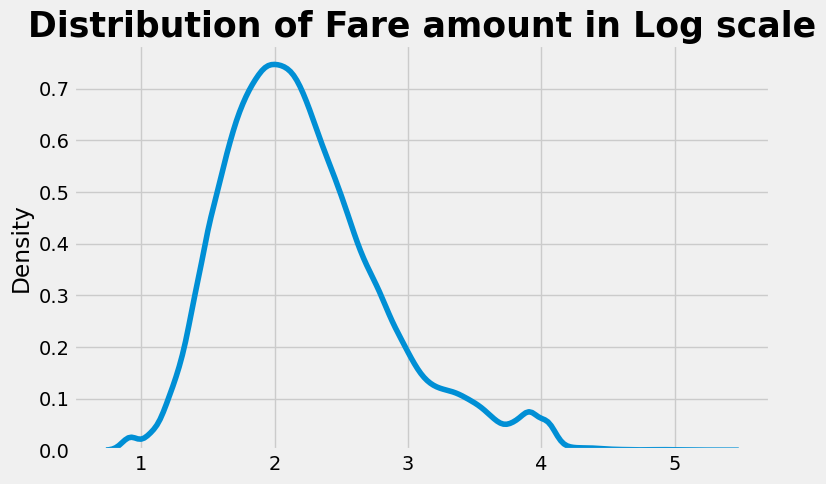

In [10]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df_raw['fare_amount'].values)).set_title(
    "Distribution of Fare amount in Log scale",fontsize = 25,fontweight='bold');

In [11]:
#Analyzing Top 5 fare amount
df_raw['fare_amount'].value_counts(normalize=True).iloc[:5]

6.5    0.048078
4.5    0.041630
8.5    0.038329
5.3    0.029267
5.7    0.028796
Name: fare_amount, dtype: float64

Text(0, 0.5, 'Count')

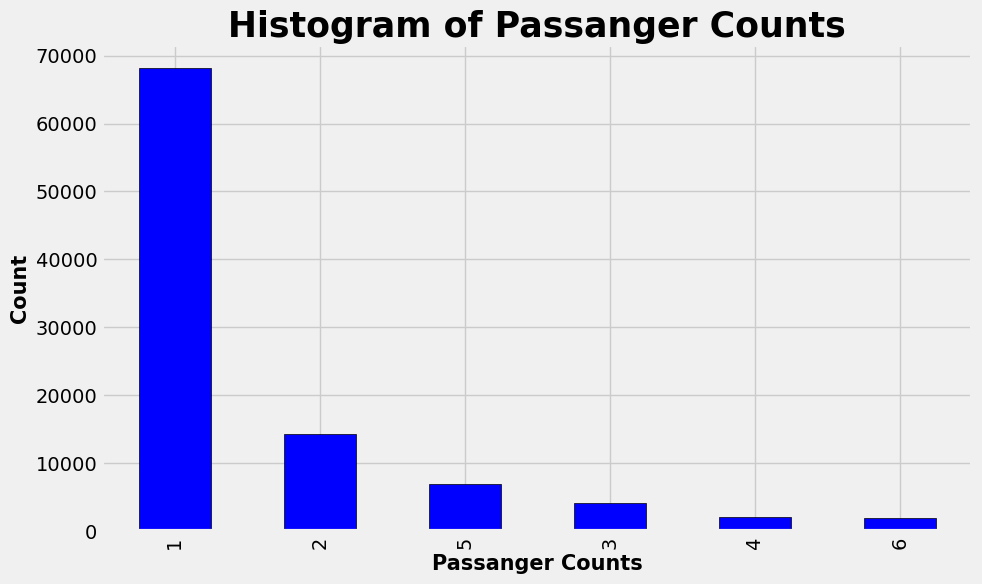

In [12]:
#Passanger Counts
plt.figure(figsize=(10,6))
df_raw['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Histogram of Passanger Counts',fontsize=25,fontweight='bold')
plt.xlabel('Passanger Counts',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')

Text(0, 0.5, 'Count')

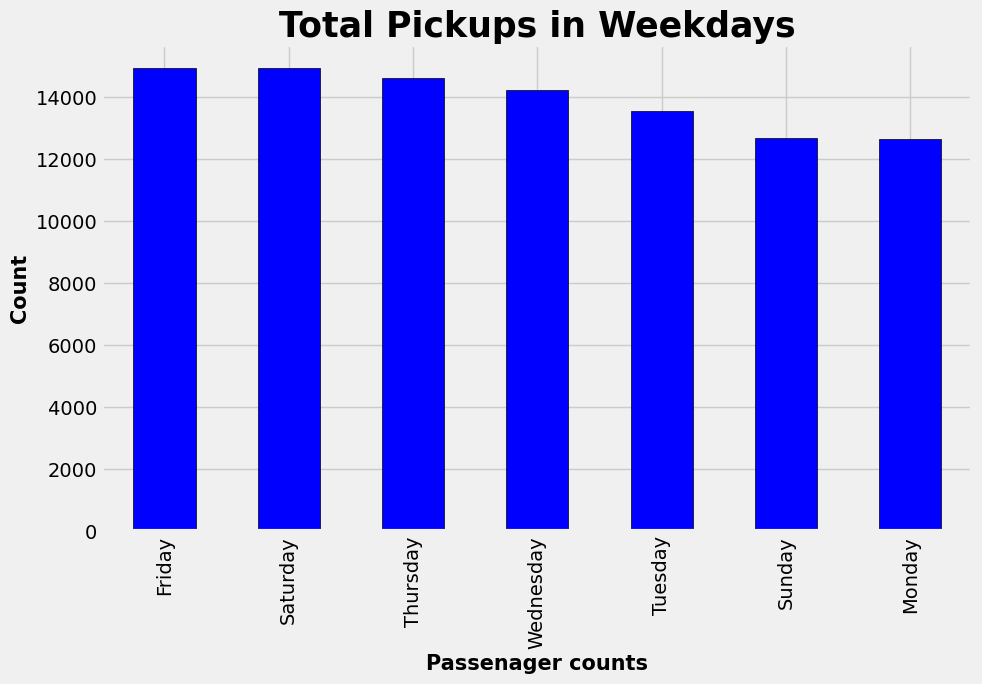

In [13]:
plt.figure(figsize=(10,6))
df_raw['pickup_day_of_week'].value_counts().plot.bar(color='b',edgecolor = 'k');
plt.title('Total Pickups in Weekdays',fontsize=25,fontweight='bold')
plt.xlabel('Passenager counts',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')

In [14]:
#Analyze Number of passangers
df_raw['passenger_count'].value_counts()

1    68120
2    14293
5     6876
3     4214
4     2042
6     2004
Name: passenger_count, dtype: int64

(-74.03, -73.75)

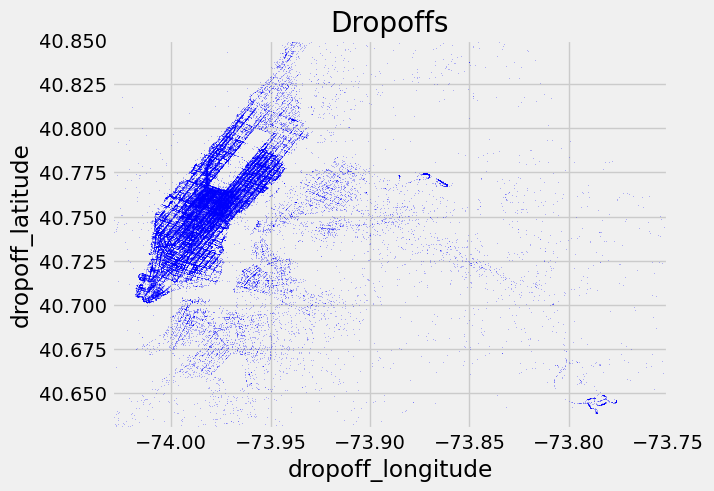

In [15]:
#Plot Heatmap of pickups and Dropoffs within New York
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

df_raw.plot(kind='scatter',x='dropoff_longitude',y='dropoff_latitude',
           color='blue',s=.02, alpha=.6)
plt.title('Dropoffs')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [16]:
def distance(lat1, lon1, lat2, lon2):
    p=0.017453292519943295 #pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2+np.cos(lat1*p)*np.cos(lat2*p)*(1-np.cos((lon2-lon1)*p))/2
    return 0.6213712*12742 * np.arcsin(np.sqrt(a))

#add new column to dataframe with distance in miles
df_raw['distance_miles']=distance(df_raw.pickup_latitude, df_raw.pickup_longitude,\
                                 df_raw.dropoff_latitude, df_raw.dropoff_longitude)

df_raw.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


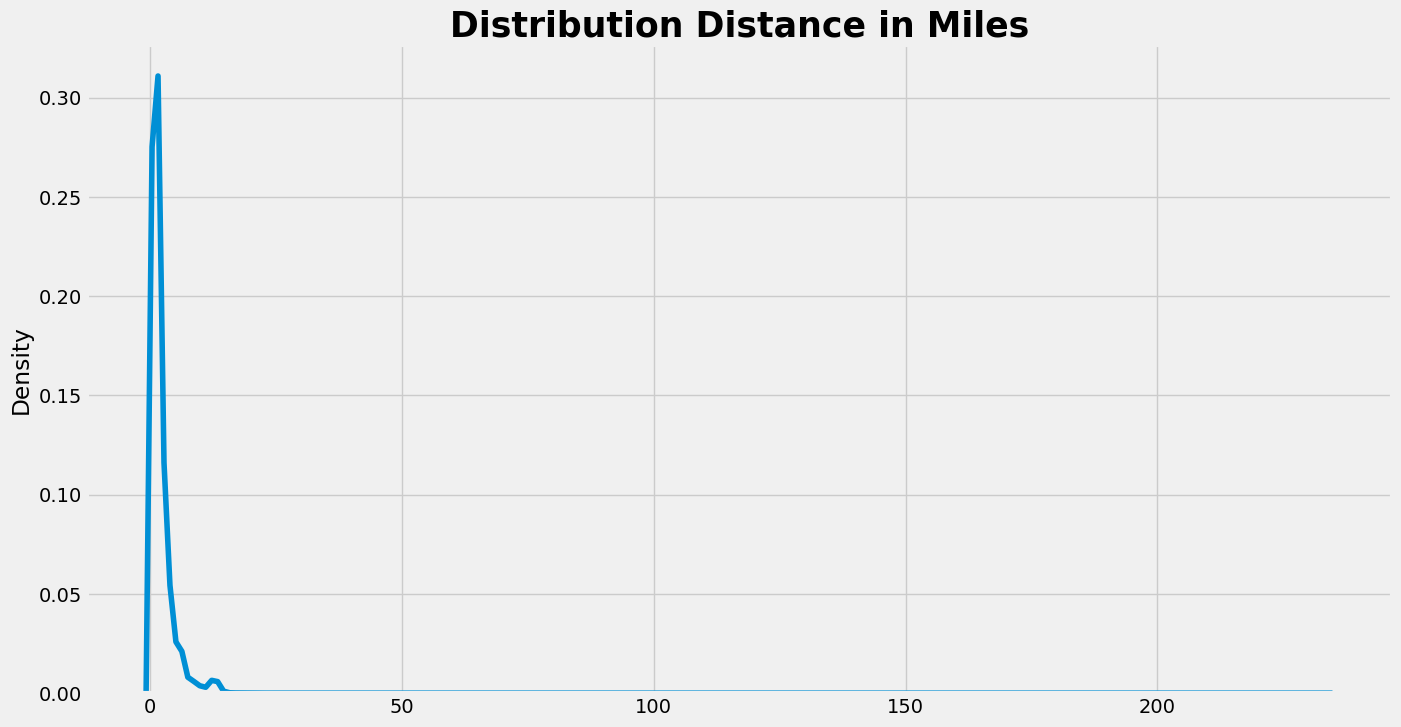

In [17]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_raw['distance_miles'].values).set_title(
    'Distribution Distance in Miles', fontsize=25, fontweight='bold');

In [20]:
import folium
Pickup_Locations = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap', zoom_start=12)
for each in df_raw[:500].iterrows():
    folium.CircleMarker([each[1]['pickup_latitude'],each[1]['pickup_longitude']],
                       radius=3,
                       color='blue',
                       popup=str(each[1]['pickup_latitude'])+','+str(each[1]['pickup_longitude']),
                       fillup_color='#FD8A6C').add_to(Pickup_Locations)
Pickup_Locations

In [21]:
import folium
Dropoff_Locations = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap', zoom_start=12)
for each in df_raw[:500].iterrows():
    folium.CircleMarker([each[1]['dropoff_latitude'],each[1]['dropoff_longitude']],
                       radius=3,
                       color='red',
                       popup=str(each[1]['dropoff_latitude'])+','+str(each[1]['dropoff_longitude']),
                       fillup_color='#FD8A6C').add_to(Dropoff_Locations)
Dropoff_Locations

In [22]:
df_final=df_raw.copy()
df_final.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


In [23]:
#Inputing Chronological Variables
Variables={'Monday' : 1, 'Tuesday' : 2, 'Thursday' : 3, 'Saturday' : 4, 'Wednesday' : 5,'Sunday' : 6, 'Friday' : 7}
year={2012: 1, 2013: 2, 2011: 3, 2009: 4, 2010: 5, 2014: 6, 2015: 7}
df_final['pickup_year']=df_final['pickup_year'].map(year)
df_final['pickup_day_of_week']=df_final['pickup_day_of_week'].map(Variables)
df_final.drop(['pickup_datetime','pickup_date'],axis=1,inplace=True)
df_final.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,4,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,5,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,4,1,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,5,1.242218


In [24]:
from sklearn.model_selection import train_test_split

x=df_final.drop(['fare_amount'],axis=1)
y=df_final[['fare_amount']]

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=42)
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",x_test.shape)

Shape of x_train :  (68284, 11)
Shape of x_test :  (29265, 11)
Shape of y_train :  (68284, 1)
Shape of y_test :  (29265, 11)


In [25]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f" %mean_squared_error(y_test, y_pred)**0.5)

Test RMSE: 7.037


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
print("Test RMSE : %.3f "%mean_squared_error(y_test,y_pred)**0.5)

Test RMSE : 4.606 


In [27]:
import pickle

#Save the trusted module as a Pickle String

pickle.dump(rf, open('rf','wb'))

In [28]:
import folium
Enter_Coordinates = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap',
                              zoom_start=12)
popup = folium.LatLngPopup()
popup=folium.ClickForMarker()

#folium.latLngPopup().add_to(Enter_coordinates)
Enter_Coordinates.add_child(popup)

Enter_Coordinates

In [29]:
Pickup_Finder = folium.Map(location = [40.767937, -73.982155],titles = 'OpenStreetMap',
                          zoom_star=15)
Pickup=[40.744075,-74.003197]
Drop_off=[40.7616, -73.9734]

points=[]
for i in range(len(Pickup)):
    points.append([Pickup[i], Drop_off[i]])
    
print('Distance Between Pickup and Dropoff in miles is : ',distance(Pickup[0], Pickup[1], Drop_off[0], Drop_off[1]))

folium.CircleMarker(Pickup,radius=5,color='blue',popup=str([Pickup[0],Pickup[1]]),
                   fill_color='#FD8A6C').add_to(Pickup_Finder)
folium.CircleMarker(Drop_off,radius=5,color='red',popup=str([Drop_off[0],Drop_off[1]]),
                   fill_color='#FD8A6C').add_to(Pickup_Finder)

for index,lat in enumerate(Pickup):
    folium.Marker([lat,
                  Drop_off[index]],
                 icon=folium.Icon(color='green',icon='plus')).add_to(Pickup_Finder)
    
folium.PolyLine([Pickup, Drop_off], color='green',weight=3, opacity=5).add_to(Pickup_Finder)

Pickup_Finder

Distance Between Pickup and Dropoff in miles is :  1.9744617137237859


In [30]:
print('Enter Your information to Predict fare :')

Pickup_Coordinates = str(input('Enter the Pickup Coordiantes:'))
Drop_off_Coordinates = str(input('Enter the Drop off Coordinates: '))

pickup_latitude = float(Pickup_Coordinates.split(',')[0])
pickup_longitude = float(Pickup_Coordinates.split(',')[1])
dropoff_latitude = float(Pickup_Coordinates.split(',')[0])
dropoff_longitude = float(Pickup_Coordinates.split(',')[1])

Enter_Date = input("Enter the date (DD/MM/YY): ")
passanger_count=int(input("Enter the Number of passanger/s: "))
pickup_day=int(Enter_Date.split('/')[0])
pickup_hour=int(input('Enter the Hour: '))
pickup_day_of_week=int(input("Enter the Week: "))
pickup_month=int(Enter_Date.split('/')[1])
pickup_year=int(Enter_Date.split('/')[2])

distance_miles = distance(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude)

my_array = np.array([pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,
                    passanger_count,pickup_day,pickup_hour,pickup_day_of_week,
                    pickup_month,pickup_year,distance_miles])
print('Fare Amount ($) : ', rf.predict(my_array.reshape(1,-1)))

Enter Your information to Predict fare :
Enter the Pickup Coordiantes:46.26,67.14
Enter the Drop off Coordinates: 56.15,71.35
Enter the date (DD/MM/YY): 10/11/2012
Enter the Number of passanger/s: 4
Enter the Hour: 2
Enter the Week: 3
Fare Amount ($) :  [40.05909023]
